## House Price Prediction


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking analayize the collected data to select prospective properties to buy and enter the market.

Our target is to build a regression model using regularization, Ridge, and Lasso to predict the actual value of the prospective properties and help the company to decide whether to invest in them or not.

The model will enable the company to know:

Which variables are significant in predicting the price of a house, and how well the relate and describe the price.

## 1. Our first step is to explore, understand, cleans, and filter the data that support our analysis.


In [1]:
# Let's first import the required libraries to load and interpret the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# hide annoying warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reaad the provided dataset (house sales in Australia)
houses = pd.read_csv("train.csv")

#### Data Exploration and understanding

In [3]:
# have a look at the data set
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses.shape

(1460, 81)

#### 1460 rows is a good size of data to provide good analysis; 81 rows is a big number of variables to include in our model and could make it too complex. 
Let's start by understanding data and identify significat variables from the business and data point of view.

In [5]:
# Explore the variables (Columns)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#we notice some columns with few non-null values! these columns will not add value to our analysis as they have little data.
# We have so many other variables, so let's drop all columns with more than 90% null values. 
limitna = len(houses.index) * .9
houses = houses.dropna(thresh=limitna, axis=1)

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### 6 columns are dropped due to null value limitation.
#### We notice many object variables in the dataset! Let's check and understand each of the Object variables, their values, and importance.

In [8]:
houses_catvar = houses.select_dtypes(include=['object'])
houses_catvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [9]:
#If a Categorical variable has a highh percentage of the values in single category, it will not benefit the analysis.
#Let's check these variables and the highest count in each category.
for col in houses_catvar.columns:
    print(col, houses[col].value_counts().max())

MSZoning 1151
Street 1454
LotShape 925
LandContour 1311
Utilities 1459
LotConfig 1052
LandSlope 1382
Neighborhood 225
Condition1 1260
Condition2 1445
BldgType 1220
HouseStyle 726
RoofStyle 1141
RoofMatl 1434
Exterior1st 515
Exterior2nd 504
MasVnrType 864
ExterQual 906
ExterCond 1282
Foundation 647
BsmtQual 649
BsmtCond 1311
BsmtExposure 953
BsmtFinType1 430
BsmtFinType2 1256
Heating 1428
HeatingQC 741
CentralAir 1365
Electrical 1334
KitchenQual 735
Functional 1360
GarageType 870
GarageFinish 605
GarageQual 1311
GarageCond 1326
PavedDrive 1340
SaleType 1267
SaleCondition 1198


In [10]:
#We notice many categorical variables have very high percentage in single category. Such variable will not benefit the analysis
#Let's drop all variables with more than 80% of the values in a single category
for col in houses_catvar.columns:
    if houses[col].value_counts().max() > len(houses.index)*0.8:
        houses.drop(col, inplace=True, axis=1)
        houses_catvar.drop(col, inplace=True, axis=1)
houses_catvar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   LotShape      1460 non-null   object
 2   LotConfig     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   HouseStyle    1460 non-null   object
 5   RoofStyle     1460 non-null   object
 6   Exterior1st   1460 non-null   object
 7   Exterior2nd   1460 non-null   object
 8   MasVnrType    1452 non-null   object
 9   ExterQual     1460 non-null   object
 10  Foundation    1460 non-null   object
 11  BsmtQual      1423 non-null   object
 12  BsmtExposure  1422 non-null   object
 13  BsmtFinType1  1423 non-null   object
 14  HeatingQC     1460 non-null   object
 15  KitchenQual   1460 non-null   object
 16  GarageType    1379 non-null   object
 17  GarageFinish  1379 non-null   object
dtypes: object(18)
memory usage: 205.4+ KB


#### 20 columns are dropped Due to single category dominance; Let's examin the remaining 18 columns and see what variables are significant for the analysis and our modle building. 
### We will not use automated dummy variables creation as we will use business to handle these variables.

In [11]:
houses.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [12]:
#One Category (Residential Low Density) represent around 80% of the data compared to 20% for all other 4 categories. 
#The Data doesn't provide any insight on Residential vs commercial or Industerial for example, so this data is not critical
#Thus MSZoning will not add to the analysis, so let's drop it
houses.drop('MSZoning', inplace=True, axis=1)
houses_catvar.drop('MSZoning', inplace=True, axis=1)

In [13]:
houses.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [14]:
#This variable seems significant for the analysis! 
#From Business analysis, We can divide the houses as Regular (Reg) and Irregular (IR1,IR2, IR3). 
houses['LotShape_Reg']=np.where(houses['LotShape']=='Reg',1,0)
houses_catvar['LotShape_Reg']=np.where(houses_catvar['LotShape']=='Reg',1,0)
houses.drop('LotShape', inplace=True, axis=1)
houses_catvar.drop('LotShape', inplace=True, axis=1)

In [15]:
houses.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [16]:
#We have 5 Categories where single category represents more than 75% of the data and 4 catgories combined represent < 25%;
#LotConfig and LotShape could also be highly correlated. Thus, this variable will not benefit the analysis, so let's drop it.
houses.drop('LotConfig', inplace=True, axis=1)
houses_catvar.drop('LotConfig', inplace=True, axis=1)

In [17]:
houses.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [18]:
#This variable represents the physical area of the house and is important for our analysis; 
#Lets add a variable for each area with a value 1/0 where 1 represent the house is located in the corresponding location.
#Then drop the Neighborhood variable
                                             
for col in houses.Neighborhood.value_counts().index:
    houses['Neighborhood_'+col]=np.where(houses['Neighborhood']==col,1,0)
    houses_catvar['Neighborhood_'+col]=np.where(houses_catvar['Neighborhood']==col,1,0)
houses.drop('Neighborhood', inplace=True, axis=1)
houses_catvar.drop('Neighborhood', inplace=True, axis=1)

In [19]:
houses.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [20]:
#We can combine different categories of this variable as 1Story, 2Story, and Split.
houses['HouseStyle_1Story']=np.where(houses['HouseStyle'].isin(['1Story','1.5Fin','1.5Unf']),1,0)
houses['HouseStyle_2Story']=np.where(houses['HouseStyle'].isin(['2Story','2.5Fin','2.5Unf']),1,0)
houses['HouseStyle_Split']=np.where(houses['HouseStyle'].isin(['SLvl','SFoyer']),1,0)
houses_catvar['HouseStyle_1Story']=np.where(houses_catvar['HouseStyle'].isin(['1Story','1.5Fin','1.5Unf']),1,0)
houses_catvar['HouseStyle_2Story']=np.where(houses_catvar['HouseStyle'].isin(['2Story','2.5Fin','2.5Unf']),1,0)
houses_catvar['HouseStyle_Split']=np.where(houses_catvar['HouseStyle'].isin(['SLvl','SFoyer']),1,0)
houses.drop('HouseStyle', inplace=True, axis=1)
houses_catvar.drop('HouseStyle', inplace=True, axis=1)

In [21]:
houses.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [22]:
#One Category represent around 78% of the data. So it will not add to the analysis, so let's drop it
houses.drop('RoofStyle', inplace=True, axis=1)
houses_catvar.drop('RoofStyle', inplace=True, axis=1)

In [23]:
houses.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [24]:
#will create 5 dummy variables for the top 4 categories, and one for all other categories.
houses['Exterior_VinylSd']=np.where(houses['Exterior1st']=='VinylSd',1,0)
houses['Exterior_HdBoard']=np.where(houses['Exterior1st']=='HdBoard',1,0)
houses['Exterior_WdSdng']=np.where(houses['Exterior1st']=='Wd Sdng',1,0)
houses['Exterior_MetalSd']=np.where(houses['Exterior1st']=='MetalSd',1,0)
houses['Exterior_Plywood']=np.where(houses['Exterior1st']=='Plywood',1,0)
houses['Exterior_other']=np.where(houses['Exterior1st'].isin(['VinylSd','HdBoard','Wd Sdng','MetalSd','Plywood'])==False,1,0)
houses_catvar['Exterior_VinylSd']=np.where(houses_catvar['Exterior1st']=='VinylSd',1,0)
houses_catvar['Exterior_HdBoard']=np.where(houses_catvar['Exterior1st']=='HdBoard',1,0)
houses_catvar['Exterior_WdSdng']=np.where(houses_catvar['Exterior1st']=='Wd Sdng',1,0)
houses_catvar['Exterior_MetalSd']=np.where(houses_catvar['Exterior1st']=='MetalSd',1,0)
houses_catvar['Exterior_Plywood']=np.where(houses_catvar['Exterior1st']=='Plywood',1,0)
houses_catvar['Exterior_other']=np.where(houses_catvar['Exterior1st'].isin(['VinylSd','HdBoard','Wd Sdng','MetalSd','Plywood'])==False,1,0)
houses.drop('Exterior1st', inplace=True, axis=1)
houses_catvar.drop('Exterior1st', inplace=True, axis=1)

In [25]:
houses.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [26]:
#Exterior2nd is complementory to Exterior1st, so we can drop it as it is already covered by Exterior1st
houses.drop('Exterior2nd', inplace=True, axis=1)
houses_catvar.drop('Exterior2nd', inplace=True, axis=1)

In [27]:
houses.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
#MasVnrType and MasVnrArea have related variables and the area higher effect on price than the type.
#Mas VnrArea will be included in the analysis, so we can drop the type.
houses.drop('MasVnrType', inplace=True, axis=1)
houses_catvar.drop('MasVnrType', inplace=True, axis=1)

In [29]:
houses.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [30]:
#Consider High quality Exterior ExternalQual_HQ (Ex or Gd) vs normal or poor quality (TA,FA,Po)
Exter_HQ=['Ex','Gd']
houses['ExterQual_HQ']=np.where(houses['ExterQual'].isin(Exter_HQ),1,0)
houses_catvar['ExterQual_HQ']=np.where(houses_catvar['ExterQual'].isin(Exter_HQ),1,0)
houses.drop('ExterQual', inplace=True, axis=1)
houses_catvar.drop('ExterQual', inplace=True, axis=1)

In [31]:
houses.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [32]:
#Will creat 3 variables for foundation
houses['Foundation_PConc']=np.where(houses['Foundation']=='PConc',1,0)
houses['Foundation_CBlock']=np.where(houses['Foundation']=='CBlock',1,0)
houses['Foundation_others']=np.where(houses['Foundation'].isin(['BrkTil','Slab','Stone','Wood']),1,0)
houses_catvar['Foundation_PConc']=np.where(houses_catvar['Foundation']=='PConc',1,0)
houses_catvar['Foundation_CBlock']=np.where(houses_catvar['Foundation']=='CBlock',1,0)
houses_catvar['Foundation_others']=np.where(houses_catvar['Foundation'].isin(['BrkTil','Slab','Stone','Wood']),1,0)
houses.drop('Foundation', inplace=True, axis=1)
houses_catvar.drop('Foundation', inplace=True, axis=1)

In [33]:
#For basement description variables they are already covered by the general house variable
#so they are not critical business wise, and let's drop them
houses.drop('BsmtQual', inplace=True, axis=1)
houses.drop('BsmtExposure', inplace=True, axis=1)
houses.drop('BsmtFinType1', inplace=True, axis=1)
houses_catvar.drop('BsmtQual', inplace=True, axis=1)
houses_catvar.drop('BsmtExposure', inplace=True, axis=1)
houses_catvar.drop('BsmtFinType1', inplace=True, axis=1)

In [34]:
#For Garage variables (GarageType, and GarageFinish) will not have high impact on house price; 
#There are already other variables that cover the garage effect like Garage_cars,and Area with highe influence on price.
#so let's drop GarageType, and GarageFinish.
houses.drop('GarageType', inplace=True, axis=1)
houses.drop('GarageFinish', inplace=True, axis=1)
houses_catvar.drop('GarageType', inplace=True, axis=1)
houses_catvar.drop('GarageFinish', inplace=True, axis=1)

In [35]:
houses.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [36]:
#We will consider High HeatingQC (GD & Ex) vs. Normal or Poor (TA,Fa,Po)
houses['Heating_HQ']=np.where(houses['HeatingQC'].isin(['Gd','Ex']),1,0)
houses_catvar['Heating_HQ']=np.where(houses_catvar['HeatingQC'].isin(['Gd','Ex']),1,0)
houses.drop('HeatingQC', inplace=True, axis=1)
houses_catvar.drop('HeatingQC', inplace=True, axis=1)

In [37]:
houses.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [38]:
#We will consider High KitcheQual (GD & Ex) vs. Normal or Poor (TA,Fa,Po)
houses['Kitchen_HQ']=np.where(houses['KitchenQual'].isin(['Gd','Ex']),1,0)
houses_catvar['Kitchen_HQ']=np.where(houses_catvar['KitchenQual'].isin(['Gd','Ex']),1,0)
houses.drop('KitchenQual', inplace=True, axis=1)
houses_catvar.drop('KitchenQual', inplace=True, axis=1)

In [39]:
#Let's recheck our data now to see if we still have any Object variables.
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   MSSubClass            1460 non-null   int64  
 2   LotArea               1460 non-null   int64  
 3   OverallQual           1460 non-null   int64  
 4   OverallCond           1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   YearRemodAdd          1460 non-null   int64  
 7   MasVnrArea            1452 non-null   float64
 8   BsmtFinSF1            1460 non-null   int64  
 9   BsmtFinSF2            1460 non-null   int64  
 10  BsmtUnfSF             1460 non-null   int64  
 11  TotalBsmtSF           1460 non-null   int64  
 12  1stFlrSF              1460 non-null   int64  
 13  2ndFlrSF              1460 non-null   int64  
 14  LowQualFinSF          1460 non-null   int64  
 15  GrLivArea            

#### Let's now visualize the variable correlation; we will exclude the Neibourhood variables  

In [40]:
for col in houses_catvar.columns:
    if 'Neighborhood' in col:
        houses_catvar.drop(col, inplace=True, axis=1)

In [41]:
# correlation matrix
cor = houses_catvar.corr()
cor

,LotShape_Reg,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Split,Exterior_VinylSd,Exterior_HdBoard,Exterior_WdSdng,Exterior_MetalSd,Exterior_Plywood,Exterior_other,ExterQual_HQ,Foundation_PConc,Foundation_CBlock,Foundation_others,Heating_HQ,Kitchen_HQ
LotShape_Reg,1.000000,0.074679,-0.064028,-0.025781,-0.090095,-0.069876,0.071404,0.097816,-0.067482,0.077309,-0.191757,-0.148558,0.058282,0.136927,-0.088326,-0.172668
HouseStyle_1Story,0.074679,1.000000,-0.857808,-0.344438,-0.098117,-0.062394,0.104430,0.056146,-0.006078,0.043007,-0.130041,-0.178787,0.129853,0.074551,-0.087796,-0.135365
HouseStyle_2Story,-0.064028,-0.857808,1.000000,-0.187059,0.151861,0.005926,-0.078039,-0.044893,-0.058021,-0.048489,0.208365,0.246899,-0.229973,-0.026406,0.128247,0.194477
HouseStyle_Split,-0.025781,-0.344438,-0.187059,1.000000,-0.089856,0.108429,-0.057052,-0.025310,0.117595,0.006370,-0.132050,-0.109266,0.171878,-0.094255,-0.066450,-0.096506
Exterior_VinylSd,-0.090095,-0.098117,0.151861,-0.089856,1.000000,-0.312611,-0.299208,-0.310948,-0.208647,-0.284673,0.473652,0.562049,-0.429859,-0.201657,0.405078,0.407898
Exterior_HdBoard,-0.069876,-0.062394,0.005926,0.108429,-0.312611,1.000000,-0.171633,-0.178368,-0.119685,-0.163296,-0.154528,-0.185772,0.271687,-0.129216,-0.192341,-0.127307
Exterior_WdSdng,0.071404,0.104430,-0.078039,-0.057052,-0.299208,-0.171633,1.000000,-0.170720,-0.114554,-0.156294,-0.192330,-0.207102,0.041859,0.250416,-0.090380,-0.160809
Exterior_MetalSd,0.097816,0.056146,-0.044893,-0.025310,-0.310948,-0.178368,-0.170720,1.000000,-0.119049,-0.162427,-0.156136,-0.163777,0.106093,0.087723,-0.057008,-0.158702
Exterior_Plywood,-0.067482,-0.006078,-0.058021,0.117595,-0.208647,-0.119685,-0.114554,-0.119049,1.000000,-0.108989,-0.135222,-0.167844,0.217007,-0.073735,-0.187609,-0.103534
Exterior_other,0.077309,0.043007,-0.048489,0.006370,-0.284673,-0.163296,-0.156294,-0.162427,-0.108989,1.000000,-0.037631,-0.081141,-0.004415,0.129568,-0.070096,-0.027816


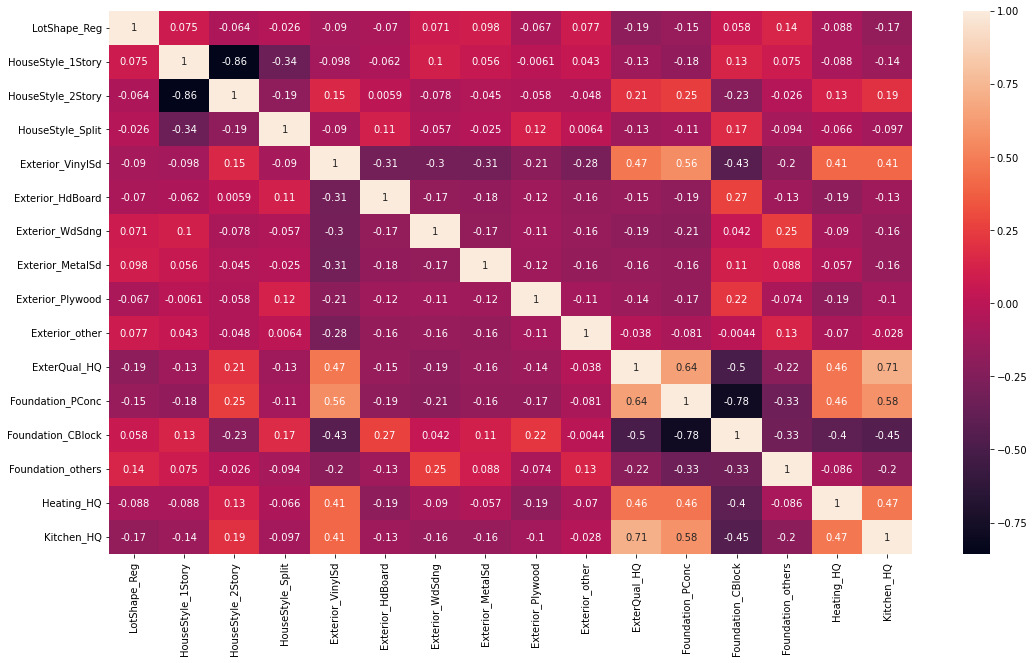

In [42]:
# plotting correlations on a heatmap

plt.figure(figsize=(18,10))
sns.heatmap(cor, annot=True)
plt.show()

In [43]:
#The heatmap shows high correlation between ExternalQual_HQ and Kitchen_HQ, so we can drop one of these variables; KitchenHQ
#High Correlation beteen HouseStyle_1Story and HouseStyle_2Story, so lets drop HouseStyle_2Story
#High Correlation between Foundation_CBlock and Foundation_PConc
#These dummy variables are based on the same categorical variable foundation, so we will keep them)
houses.drop('Kitchen_HQ', inplace=True, axis=1)
houses_catvar.drop('Kitchen_HQ', inplace=True, axis=1)
houses.drop('HouseStyle_2Story', inplace=True, axis=1)
houses_catvar.drop('HouseStyle_2Story', inplace=True, axis=1)

#### We have handled all Object Categorical variables, let's now move to numeric variables

In [44]:
# all numeric (float and int) variables in the dataset; Not including int32 variables we created for Categorica variables
houses_num = houses.select_dtypes(include=['float64', 'int64'])
houses_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

#### Most of these variables (int) have discrete values, so we should handle them as categorical
#### Based on the data dictionary provided, let's identify categorical variables from the numeric ones.
#### Let's study these categorical variables and decide which are critical to our study, and how to handle critical ones.

In [45]:
houses_catnum=houses[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold']]

In [46]:
#MSSubClass is a combination between HousStyle and YearBuilt. We have already handled HouseStype in the Object variables;
#YearBuilt will be also handled, so we can drop this variable.
houses.drop('MSSubClass', inplace=True, axis=1)
houses_catnum.drop('MSSubClass', inplace=True, axis=1)

In [47]:
#OverallQual, OverallCond are scales /10 for the overall Material and finish of the house, and its general condition 
# Let's resacle it as percentage or (0-1)
houses.OverallQual=houses.OverallQual/10
houses.OverallCond=houses.OverallCond/10
houses_catnum.OverallQual=houses.OverallQual/10
houses_catnum.OverallCond=houses.OverallCond/10

In [48]:
#YearBuilt, YearRemodAdd represent the Original construction and remodle or additions date.
#YearRemodAdd = YearBuilt if no additions or remodling is done. So we can consider YearRemodAdd and drop YearBuilt
#These variable can be used to know the Age of the house that has high impact on price.
#Let's generate an Age Score variable, on scale of 0-1 where 1 represent the newest and 0 represent the oldest
#we can score all houses with Age > 20 years 
houses['AgeScore'] = 1-(houses.YearRemodAdd.max()-houses.YearRemodAdd)/(houses.YearRemodAdd.max()-houses.YearRemodAdd.min())
houses_catnum['AgeScore'] = 1-(houses.YearRemodAdd.max()-houses.YearRemodAdd)/(houses.YearRemodAdd.max()-houses.YearRemodAdd.min())
houses.drop(['YearBuilt', 'YearRemodAdd'], inplace=True, axis=1)
houses_catnum.drop(['YearBuilt', 'YearRemodAdd'], inplace=True, axis=1)

In [49]:
#BsmtFullBath, BsmtHalfBath, FullBath, HalfBath represent the number of Bathrooms (full/half/Bsmt/Overgorund)
#As the nimber of Bathrooms has direct effect on price, we can sum all these variables and create a single var TotalBath
#Then scale this as a BathScore on a scal of (0-1), where 1 represent the max (Best) and 0 the min (worst).
houses['BathScore']=houses['BsmtFullBath']+houses['BsmtHalfBath']+houses['FullBath']+houses['HalfBath']
houses['BathScore']=1-(houses.BathScore.max()-houses.BathScore)/(houses.BathScore.max()-houses.BathScore.min())
houses_catnum['BathScore']=houses['BathScore']
houses.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True, axis=1)
houses_catnum.drop(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], inplace=True, axis=1)

In [50]:
#BedroomAbvGr and TotRmsAbvGrd; TotRmsAbvGrd covers Bedrooms so we can consider TotRmsAbvGrd and neglect BedroomAbvGr
#Let's also scale Bedrooms as a score (0-1)
houses['RoomsScore']= 1-(houses.TotRmsAbvGrd.max()-houses.TotRmsAbvGrd)/(houses.TotRmsAbvGrd.max()-houses.TotRmsAbvGrd.min())
houses_catnum['RoomsScore']=houses['RoomsScore']
houses.drop(['BedroomAbvGr', 'TotRmsAbvGrd'], inplace=True, axis=1)
houses_catnum.drop(['BedroomAbvGr', 'TotRmsAbvGrd'], inplace=True, axis=1)

In [51]:
#KitchenAbvGr; Apply same process to add a KitchenScore
houses['KitchenScore']= 1-(houses.KitchenAbvGr.max()-houses.KitchenAbvGr)/(houses.KitchenAbvGr.max()-houses.KitchenAbvGr.min())
houses_catnum['KitchenScore']=houses['KitchenScore']
houses.drop(['KitchenAbvGr'], inplace=True, axis=1)
houses_catnum.drop(['KitchenAbvGr'], inplace=True, axis=1)

In [52]:
#Fireplaces; Apply same process to add a FirePlacesScore
houses['FirePScore']= 1-(houses.Fireplaces.max()-houses.Fireplaces)/(houses.Fireplaces.max()-houses.Fireplaces.min())
houses_catnum['FirePScore']= houses['FirePScore']
houses.drop(['Fireplaces'], inplace=True, axis=1)
houses_catnum.drop(['Fireplaces'], inplace=True, axis=1)

In [53]:
#GarageYrBlt and GarageCars: GarageCars will have highe influence on price, so we can drop GarageYrBlt as it is not critical
houses['GarageScore']= 1-(houses.GarageCars.max()-houses.GarageCars)/(houses.GarageCars.max()-houses.GarageCars.min())
houses_catnum['GarageScore']=houses['GarageScore']
houses.drop(['GarageYrBlt','GarageCars'], inplace=True, axis=1)
houses_catnum.drop(['GarageYrBlt','GarageCars'], inplace=True, axis=1)

#### YrSold allows us to defines the inflation rate that we should apply on the price value to calculate the current price. According to the U.S. Bureau of Labor Statistics, the inflation rate from 1967 up to 2022 is 4.23% per year. MoSold is not critical and can be dropped

In [54]:
import datetime
houses['CurrentPrice']=round(houses['SalePrice']*(1.04)**(datetime.date.today().year-houses['YrSold'])).astype(np.int64)
houses[['YrSold','SalePrice','CurrentPrice']].head()

,YrSold,SalePrice,CurrentPrice
0,2008,208500,375497
1,2007,181500,339946
2,2008,223500,402511
3,2006,140000,272706
4,2008,250000,450236


In [55]:
#Check for any outliers in the price field
houses['CurrentPrice'].describe()

count    1.460000e+03
mean     3.288525e+05
std      1.461275e+05
min      6.043600e+04
25%      2.341230e+05
50%      2.961570e+05
75%      3.856258e+05
max      1.414101e+06
Name: CurrentPrice, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2511d3563a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2511d356a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2511d3560d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2511d356ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2511d3641f0>],
 'means': []}

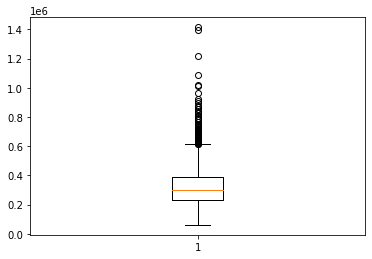

In [56]:
#More than 75% of houses perices are less than 400000, and the max is 1.4M This indicates possibility of some outliers.
#Let's plot the price to check for outliers.
plt.boxplot(houses['CurrentPrice'])

In [57]:
#The boxplot shows very few houses with price > 1000000; These could be outliers. 
#To reduce the effect of these outliers on our analysis, we can either drop them or put the price as max 1000000.
#From Business perspective a 1000000 max price is very logical.
houses=houses[houses['CurrentPrice'] < 1000000]
print(houses.shape)

(1454, 70)


In [58]:
#### We just lost 6 records; so we still have good data and reduced the possibility of price outliers.

In [59]:
houses_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [60]:
houses.drop(['MoSold','YrSold','SalePrice'], inplace=True, axis=1)
houses_num.drop(['MoSold','YrSold'], inplace=True, axis=1)

#### Let's visualize the correlation between these variable

In [61]:
# correlation matrix
#exclude the YrSold
cor = houses_catnum.corr()
cor

,OverallQual,OverallCond,MoSold,YrSold,AgeScore,BathScore,RoomsScore,KitchenScore,FirePScore,GarageScore
OverallQual,1.000000,-0.091932,0.070815,-0.027347,0.550684,0.529906,0.427452,-0.183882,0.396765,0.600671
OverallCond,-0.091932,1.000000,-0.003511,0.043950,0.073741,-0.149461,-0.057583,-0.087001,-0.023820,-0.185758
MoSold,0.070815,-0.003511,1.000000,-0.145721,0.021490,0.022672,0.036907,0.026589,0.046357,0.040522
YrSold,-0.027347,0.043950,-0.145721,1.000000,0.035743,0.008329,-0.034516,0.031687,-0.024096,-0.039117
AgeScore,0.550684,0.073741,0.021490,0.035743,1.000000,0.426079,0.191740,-0.149598,0.112581,0.420622
BathScore,0.529906,-0.149461,0.022672,0.008329,0.426079,1.000000,0.482310,0.009117,0.341565,0.468671
RoomsScore,0.427452,-0.057583,0.036907,-0.034516,0.191740,0.482310,1.000000,0.256045,0.326114,0.362289
KitchenScore,-0.183882,-0.087001,0.026589,0.031687,-0.149598,0.009117,0.256045,1.000000,-0.123936,-0.050634
FirePScore,0.396765,-0.023820,0.046357,-0.024096,0.112581,0.341565,0.326114,-0.123936,1.000000,0.300789
GarageScore,0.600671,-0.185758,0.040522,-0.039117,0.420622,0.468671,0.362289,-0.050634,0.300789,1.000000


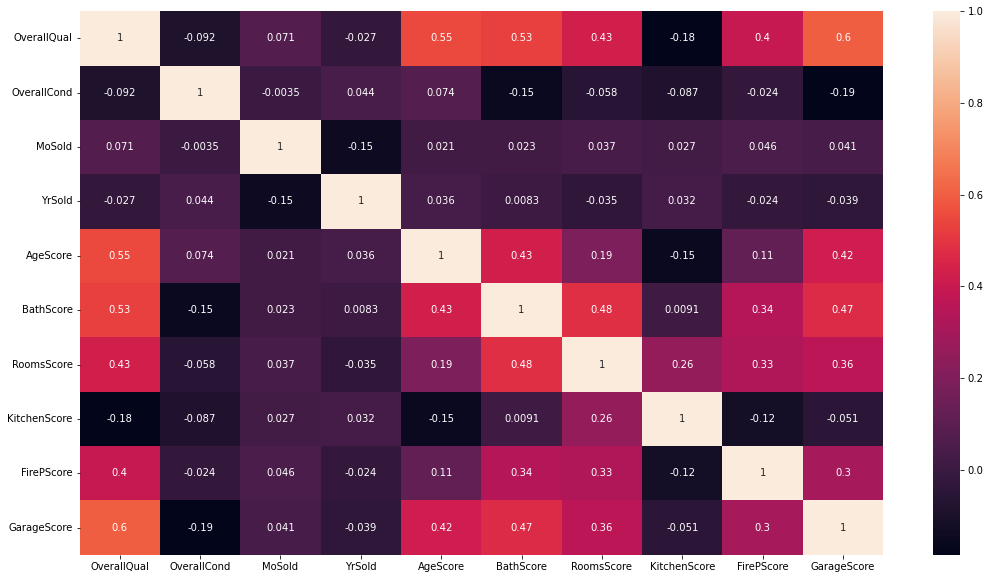

In [62]:
# plotting correlations on a heatmap

plt.figure(figsize=(18,10))
sns.heatmap(cor, annot=True)
plt.show()

#### Now we have handled all Categorical variables (object and numeric); Last group to check is are continious variables.
#### This group of variables includes (LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea)

In [63]:
houses_num=houses[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
            'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea']]

In [64]:
houses_num.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


In [65]:
#Let's handle any null values in this set if exist;
#Replace null values with 0 as these variables represenyt the Areas of different house characteristics
for col in houses_num.columns:
    houses[col]=houses[col].fillna(0)
    houses_num[col]=houses_num[col].fillna(0)
houses_num.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


In [66]:
#We notice so many Zeros in many columns, and looks like we have outliers in the max values.
#Let's check the Zero counts in each column and drop the column if the Zero Counts percentage is very high (>80%)
#If the variable has enough data (> 20%) then we will handle max outliers (replace by 90Percentile * 1.5
#After fixing outliers, we will scale the values on 0-1 scale
for col in houses_num.columns:
    if (houses[col][houses[col]==0].count() > len(houses.index)*.8):
        houses.drop([col], inplace=True, axis=1)
        houses_num.drop([col], inplace=True, axis=1)
    else:
        QMax = houses[col].quantile(0.90)*1.5
        houses[col]=np.where(houses[col]>QMax,QMax,houses[col])
        houses_num[col]=np.where(houses_num[col]>QMax,QMax,houses_num[col])
        houses[col]=1-(houses[col].max()-houses[col])/(houses[col].max()-houses[col].min())

In [67]:
houses_num.describe()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
count,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000,1454.000000
mean,9761.595323,92.491884,436.190509,564.369464,1048.038790,1155.808116,342.100172,1504.145117,470.770770,90.642710,43.580468
std,3940.554131,143.453141,426.477324,435.590501,404.584497,366.295697,427.996163,492.028227,210.296131,114.350845,55.491907
min,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,7536.250000,0.000000,0.000000,223.000000,795.000000,882.000000,0.000000,1128.000000,328.500000,0.000000,0.000000
50%,9458.500000,0.000000,382.000000,475.000000,990.000000,1086.000000,0.000000,1458.000000,478.000000,0.000000,24.000000
75%,11546.250000,162.000000,707.500000,807.500000,1290.250000,1383.000000,728.000000,1774.000000,576.000000,168.000000,68.000000
max,21435.150000,490.200000,1588.500000,1841.100000,2390.550000,2502.000000,1411.050000,3215.100000,1127.100000,391.500000,195.000000


#### Let's visualize the correlation between the num_variables

In [68]:
# correlation matrix
cor = houses_num.corr()
cor

,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
LotArea,1.000000,0.130390,0.207902,0.071047,0.339996,0.440503,0.104268,0.418594,0.329518,0.191000,0.155765
MasVnrArea,0.130390,1.000000,0.239338,0.108137,0.348589,0.328751,0.139543,0.354719,0.377453,0.161060,0.161322
BsmtFinSF1,0.207902,0.239338,1.000000,-0.529209,0.459999,0.386533,-0.178685,0.126130,0.272795,0.205593,0.087372
BsmtUnfSF,0.071047,0.108137,-0.529209,1.000000,0.434521,0.323120,-0.002077,0.243225,0.175827,-0.010732,0.141622
TotalBsmtSF,0.339996,0.348589,0.459999,0.434521,1.000000,0.802264,-0.229350,0.395204,0.477459,0.238175,0.243577
1stFlrSF,0.440503,0.328751,0.386533,0.323120,0.802264,1.000000,-0.253327,0.524099,0.479526,0.233353,0.200626
2ndFlrSF,0.104268,0.139543,-0.178685,-0.002077,-0.229350,-0.253327,1.000000,0.683933,0.125594,0.074617,0.214910
GrLivArea,0.418594,0.354719,0.126130,0.243225,0.395204,0.524099,0.683933,1.000000,0.458285,0.237502,0.334473
GarageArea,0.329518,0.377453,0.272795,0.175827,0.477459,0.479526,0.125594,0.458285,1.000000,0.228184,0.265577
WoodDeckSF,0.191000,0.161060,0.205593,-0.010732,0.238175,0.233353,0.074617,0.237502,0.228184,1.000000,0.073492


##### From buisnesss view all these variables (represent Area) should have linear relation with price. Let's confirm this by visualizing the relation between these variables and the house price

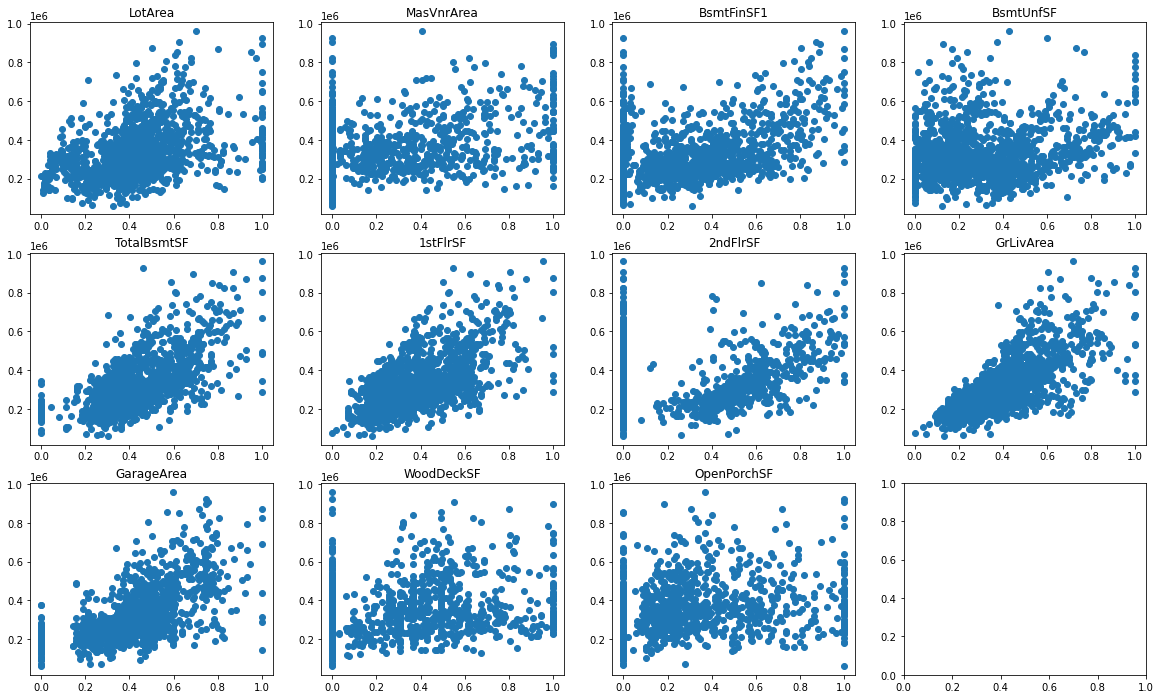

In [69]:
fig, axs=plt.subplots(3,4, figsize=(20,12))
y=houses['CurrentPrice']
i = 0
j = 0
for col in houses_num.columns:
    x=houses[col]
    axs[i,j].scatter(x,y)
    axs[i,j].set_title(col)
    if j < 3:
        j=j+1
    else:
        j=0
        i=i+1
#sns.scatterplot(data=houses, x='LotArea',y='CurrentPrice',axs[1,1])
plt.show()


In [70]:
#The plots display acceptable correlation between different area and price.
#BsmtFinSF1, BsmtUnfSF, WoodDeckSF, and OpenPorchSF don't show clear linear relation, but still acceptable. 

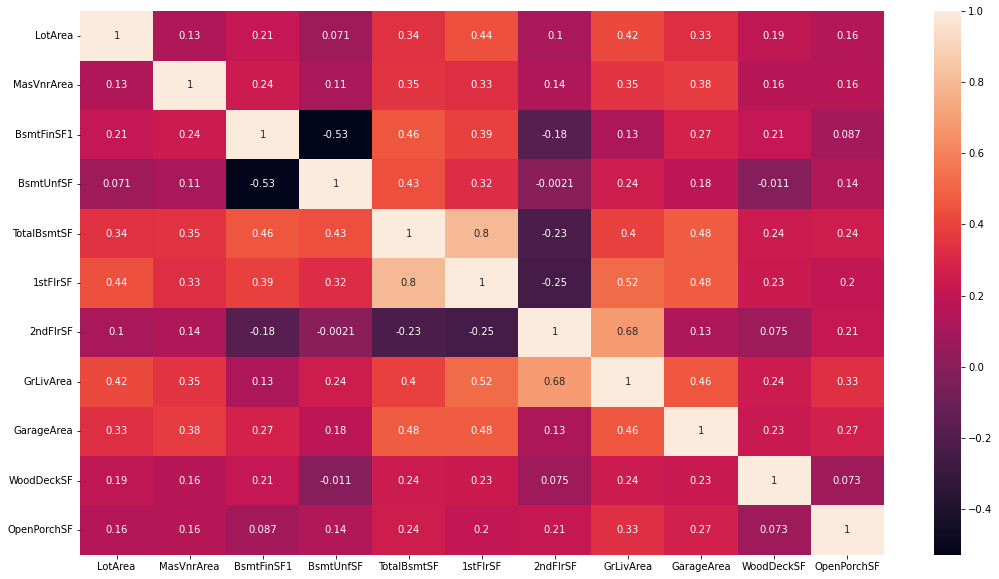

In [71]:
# plotting correlations on a heatmap

plt.figure(figsize=(18,10))
sns.heatmap(cor, annot=True)
plt.show()

In [72]:
#From the heatmap, we see high correlation between 1stFlrSF and TotalBsmtSF, and between 2ndFlrSF and GrLivArea
#These correlations are realistic from business view as the first floor area is dependent on the basement area.
#Same for 2ndFlr and GrLivArea
houses.drop(['1stFlrSF','2ndFlrSF' ], inplace=True, axis=1)
houses_num.drop(['1stFlrSF','2ndFlrSF'], inplace=True, axis=1)

In [73]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1454 non-null   int64  
 1   LotArea               1454 non-null   float64
 2   OverallQual           1454 non-null   float64
 3   OverallCond           1454 non-null   float64
 4   MasVnrArea            1454 non-null   float64
 5   BsmtFinSF1            1454 non-null   float64
 6   BsmtUnfSF             1454 non-null   float64
 7   TotalBsmtSF           1454 non-null   float64
 8   GrLivArea             1454 non-null   float64
 9   GarageArea            1454 non-null   float64
 10  WoodDeckSF            1454 non-null   float64
 11  OpenPorchSF           1454 non-null   float64
 12  MiscVal               1454 non-null   int64  
 13  LotShape_Reg          1454 non-null   int32  
 14  Neighborhood_NAmes    1454 non-null   int32  
 15  Neighborhood_CollgCr 

### We have now a clean data set of variables all scaled on a (0-1) scale. So let's start building our model.

## Building and Training the Model on the train data set

In [74]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [75]:
#let's first drop the Id and convert the CurrentPrice into 10K Values
#We will not scale the price on 0-1 scale to keep it more presentable, for example rmse of 5 will means 50,000
houses.drop('Id', inplace=True, axis=1)
houses['CurrentPrice']=houses['CurrentPrice']/10000

In [76]:
# split into X and y
X_col = houses.drop(['CurrentPrice'], axis=1)
X = np.array(X_col).reshape(-1,houses.shape[1]-1)
Y = np.array(houses['CurrentPrice']).reshape(-1,1)

In [77]:
# split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, Y_train.shape

((1017, 57), (1017, 1))

In [78]:
# Building the linear regression model 
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression()

In [79]:
Y_train_pred=lreg.predict(X_train)
Y_test_pred=lreg.predict(X_test)
print('train_r2:\t'+str(metrics.r2_score(Y_train, Y_train_pred)))
print('test_r2:\t'+str(metrics.r2_score(Y_test, Y_test_pred)))


train_r2:	0.8558424348306615
test_r2:	0.8726894033325


#### R2 for our modle is 0.84 for both train and test data! This is good. 
#### Let's also calculate rmse and compare train and test results for both r2 and rmse.

In [80]:
from sklearn.metrics import mean_squared_error
train_rss_avg = np.sum(np.square(Y_train - Y_train_pred))/len(Y_train)
test_rss_avg = np.sum(np.square(Y_test - Y_test_pred))/len(Y_test)
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
train_rmse = train_mse**0.5
test_rmse = test_mse**0.5
print('\t\tr2\t\t\trss_avg\t\t\trsme')
print('Train:\t', metrics.r2_score(Y_train, Y_train_pred),'\t',train_rss_avg,'\t',train_rmse)
print('Test:\t', metrics.r2_score(Y_test, Y_test_pred),'\t',test_rss_avg,'\t',test_rmse)

		r2			rss_avg			rsme
Train:	 0.8558424348306615 	 26.452168167508862 	 5.143167133927194
Test:	 0.8726894033325 	 22.839089219931232 	 4.779025969790417


##### Again the rmse values are so close between train and test data which proves that the model is performing well and there is no overfitting issue. To confirm these results let's do some Residual analysis.

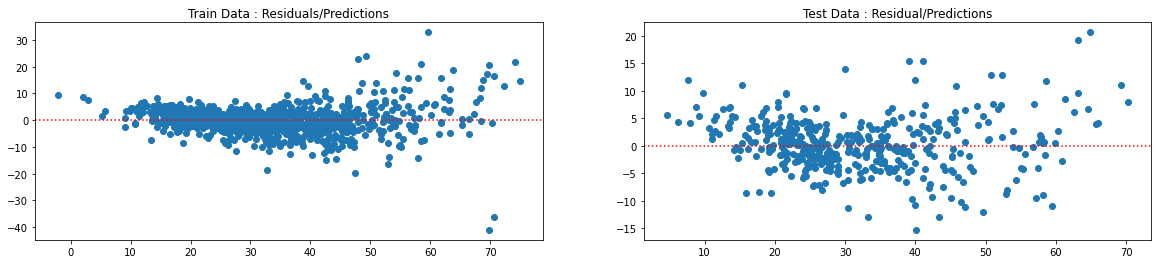

In [81]:
# Residual analysis on train data
fig, axs=plt.subplots(1,2, figsize=(20,4))
axs[0].scatter(Y_train_pred , Y_train-Y_train_pred)
axs[0].set_title('Train Data : Residuals/Predictions')
axs[0].axhline(y=0, color='r', linestyle=':')
axs[1].scatter(Y_test_pred , Y_test-Y_test_pred)
axs[1].set_title('Test Data : Residual/Predictions')
axs[1].axhline(y=0, color='r', linestyle=':')
plt.show()

#### The Residual Analysis shows that most residual are centered around 0 and within an exceptable range. Few goes beyond 10K.
#### Last step, let's find the coefficient to identify the most significant variables.

In [82]:
# Let's find the model coefficients and sort them from most to least significant
model_intercept=str(lreg.intercept_)
coefficients = lreg.coef_[0]
model_coef = pd.DataFrame(columns=['var','coef'])
i=0
for col in X_col.columns:
    model_coef=model_coef.append({'var':col,'coef':coefficients[i]}, ignore_index=True)
    i=i+1
print(model_coef.sort_values(by=['coef'],ascending=False))

                     var       coef
7              GrLivArea  24.087006
1            OverallQual   18.26868
2            OverallCond    9.63765
19  Neighborhood_NridgHt    8.81698
56           GarageScore   8.536302
30  Neighborhood_StoneBr   7.862806
4             BsmtFinSF1   7.753747
0                LotArea   6.490234
35  Neighborhood_Veenker   6.391886
6            TotalBsmtSF   5.017376
26  Neighborhood_NoRidge   4.629694
53            RoomsScore   3.280434
39      HouseStyle_Split   2.638501
17  Neighborhood_Somerst   2.582968
10           OpenPorchSF   2.279766
38     HouseStyle_1Story   1.941726
24  Neighborhood_Crawfor   1.785488
55            FirePScore   1.574743
45        Exterior_other   1.555824
51              AgeScore   1.184838
40      Exterior_VinylSd   1.143631
33  Neighborhood_Blmngtn   1.112674
9             WoodDeckSF   0.915641
27   Neighborhood_Timber   0.899761
47      Foundation_PConc   0.813998
5              BsmtUnfSF   0.621503
3             MasVnrArea   0

#### GrLivArea and OverallQual are the most significant variable, The Neigborhood (NridgHt, StoneBr, and NoRidge) have quite significant influence on price, and then followed by OverallCon and LotArea.
#### Although we are confident of our model, let's try different train/Test splits (test many times with random_state=None;different train/test splits) to confirm our model strength

In [83]:
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)
    reg = LinearRegression()
    reg.fit(X_train,Y_train)
    Y_train_pred=reg.predict(X_train)
    Y_test_pred=reg.predict(X_test)
    rss_train = np.sum(np.square(Y_train - Y_train_pred))
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    rmse_train = mse_train**0.5
    rss_test = np.sum(np.square(Y_test - Y_test_pred))
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    rmse_test = mse_test**0.5
    print('train_r2: '+str(metrics.r2_score(Y_train, Y_train_pred))+' | '+'rmse_train: '+str(rmse_train))
    print('test_r2: '+str(metrics.r2_score(Y_test, Y_test_pred))+' | '+'rmse_test: '+str(rmse_test))
    print('-----------')

train_r2: 0.8763748143230489 | rmse_train: 4.811580382704971
test_r2: 0.8215136824380063 | rmse_test: 5.513682727101454
-----------
train_r2: 0.8645188485321511 | rmse_train: 4.899558619463198
test_r2: 0.8554756110970717 | rmse_test: 5.301493664976308
-----------
train_r2: 0.8601722749580353 | rmse_train: 5.099477146365507
test_r2: 0.8613759808375366 | rmse_test: 4.904646718667643
-----------
train_r2: 0.8670810949592436 | rmse_train: 4.807098971672075
test_r2: 0.8525763651215108 | rmse_test: 5.460729895307251
-----------
train_r2: 0.8548326137119302 | rmse_train: 5.169139206400461
test_r2: 0.8789147229650919 | rmse_test: 4.649661460630807
-----------
train_r2: 0.8617865317308966 | rmse_train: 5.04314140618343
test_r2: 0.8599495025045134 | rmse_test: 4.986980348584165
-----------
train_r2: 0.8623103102158183 | rmse_train: 5.068160694874963
test_r2: 0.8612869625851579 | rmse_test: 4.893311720827654
-----------
train_r2: 0.8568061080025685 | rmse_train: 5.027415929940636
test_r2: 0.86468

#### The model is performing pretty well almost the same with different train and test data sets. r2 is always above 84% for both train and test data and rmse is around 5. The model is doing good job and is not sufferring  overfitting problem.
#### We can stop here and use the model as is. We know that there is no overfitting problem so trying Ridge or Lasso regression will not enhance the model and the best results will be with Alpha near 0. To prove this let's build the model using Ridge and Lasso regression
#### Building model using Ridge and Lasso

## Ridge and Lasso Models

In [84]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [85]:
#Ridge model testing different values of Alpha
alphas=[0.001,0.01,0.1,1,10,50,100]
for testalpha in alphas:
    ridge = Ridge(alpha=testalpha)
    ridge.fit(X_train, Y_train)
    Y_train_pred = ridge.predict(X_train)
    Y_test_pred = ridge.predict(X_test)
    rss_train = np.sum(np.square(Y_train - Y_train_pred))
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    rmse_train = mse_train**0.5
    rss_test = np.sum(np.square(Y_test - Y_test_pred))
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    rmse_test = mse_train**0.5
    print('Alpha = ', testalpha, '\tr2\t\t\trss\t\t\trsme')
    print('Train:\t', metrics.r2_score(Y_train, Y_train_pred),'\t',rss_train,'\t',rmse_train)
    print('Test:\t', metrics.r2_score(Y_test, Y_test_pred),'\t',rss_test,'\t',rmse_test)
    print('-'*50)

Alpha =  0.001 	r2			rss			rsme
Train:	 0.8739614130597315 	 23804.508097090136 	 4.838036374984554
Test:	 0.8333528264020111 	 12686.798614566265 	 4.838036374984554
--------------------------------------------------
Alpha =  0.01 	r2			rss			rsme
Train:	 0.8739613129205608 	 23804.527010057653 	 4.838038296923169
Test:	 0.8333711044495397 	 12685.407112370009 	 4.838038296923169
--------------------------------------------------
Alpha =  0.1 	r2			rss			rsme
Train:	 0.8739517126696268 	 23806.34017899774 	 4.838222547879538
Test:	 0.8335389331900581 	 12672.630361425345 	 4.838222547879538
--------------------------------------------------
Alpha =  1 	r2			rss			rsme
Train:	 0.8732710192277867 	 23934.900590069305 	 4.851268786595196
Test:	 0.8341930646164007 	 12622.831534992874 	 4.851268786595196
--------------------------------------------------
Alpha =  10 	r2			rss			rsme
Train:	 0.8586127055272338 	 26703.369799739703 	 5.12415854422669
Test:	 0.8236255396628165 	 13427.333993

In [86]:
#Lasso model testing different values of Alpha
alphas=[0.001,0.01,0.1,1,10,50,100]
for testalpha in alphas:
    lasso = Lasso(alpha=testalpha)
    lasso.fit(X_train, Y_train)
    Y_train_pred = lasso.predict(X_train)
    Y_test_pred = lasso.predict(X_test)
    rss_train = np.sum(np.square(Y_train - Y_train_pred))
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    rmse_train = mse_train**0.5
    rss_test = np.sum(np.square(Y_test - Y_test_pred))
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    rmse_test = mse_train**0.5
    print('Alpha = ', testalpha, '\tr2\t\t\trss\t\t\trsme')
    print('Train:\t', metrics.r2_score(Y_train, Y_train_pred),'\t',rss_train,'\t',rmse_train)
    print('Test:\t', metrics.r2_score(Y_test, Y_test_pred),'\t',rss_test,'\t',rmse_test)
    print('-'*50)

Alpha =  0.001 	r2			rss			rsme
Train:	 0.8739442256468397 	 359580294.14016515 	 4.838366236244295
Test:	 0.833488411607123 	 62829002.18206467 	 4.838366236244295
--------------------------------------------------
Alpha =  0.01 	r2			rss			rsme
Train:	 0.8726757778568227 	 356530882.52453333 	 4.862648555370103
Test:	 0.833333914214835 	 62165538.60086423 	 4.862648555370103
--------------------------------------------------
Alpha =  0.1 	r2			rss			rsme
Train:	 0.8477794459647319 	 335738262.4823744 	 5.31684519615497
Test:	 0.8082468716955079 	 58481925.08071312 	 5.31684519615497
--------------------------------------------------
Alpha =  1 	r2			rss			rsme
Train:	 0.5068399491108101 	 239934231.6658986 	 9.569986186448457
Test:	 0.4867343194189665 	 42186242.94714847 	 9.569986186448457
--------------------------------------------------
Alpha =  10 	r2			rss			rsme
Train:	 0.0004715312015196593 	 192158303.0800422 	 13.624323612989844
Test:	 -0.00391005075234796 	 33412814.652664

#### The above proves our conclusion that Ridge and Lasso do no improvement over our linear model. Best r2 and rmse are obtained when Alpha is near Zero. r2 decreases and rmse increases as Alpha increases.

## Conclusion
#### Our Analysis, data understanding, and data preperation enabled our model to properly predict house pricing using the linear regression model with no overfitting problem.
##### We used Business and data analysis process to handle categorical variables instead of automated Dummies creation. The special handling of categorical variables (merging, splitting, and modification) enabled the creation of highly accurate linear model with no overfitting problem.  
##### Our Linear Regression module performed well on both train and test data with no overfitting problem. 
##### The model r2 is 84% for both data sets (train and test) and rmse of 5.6 for train data and 6.2 for test. 
##### Residual analysis of the model shows that most residuals are centered around zero in an acceptable variance range.
#### the model handled the variables and selected variables based on Business analysis and data values. 
#### Some variables were dropped, some were combined, some were splitted, and some were used to generate new variables.
#### The sold year was used to calculate the current value based on the Selling price (Annual inflation rate of 4% was used).
#### Variables with highest influence on price are: GrLivArea  23.439658; OverallQual  20.732023; Neighborhood has good influence on price (NridgHt,StoneBr, and NoRidge) are the most required; OverallCond, LotArea, Garage Areas and TotalBsmtSF, and total rooms are also significant.
#### The Above information provides the company with a solid decision support regarding investments and selecting houses based on whuch condition and neighbourhood. The model provides good house price estimation.